##  Unsupervised Learning Series

In [7]:
# This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
import numpy as np
import copy

# custom libs
from mlrefined_libraries import unsupervised_library as unsuplib
from mlrefined_libraries import basics_library as baslib
datapath = '../../mlrefined_datasets/unsuperlearn_datasets/'


# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# BLAH

#### <span style="color:#a50e3e;">Example 1. </span>  Transforming data using a fixed basis / spanning set

<IPython.core.display.Javascript object>


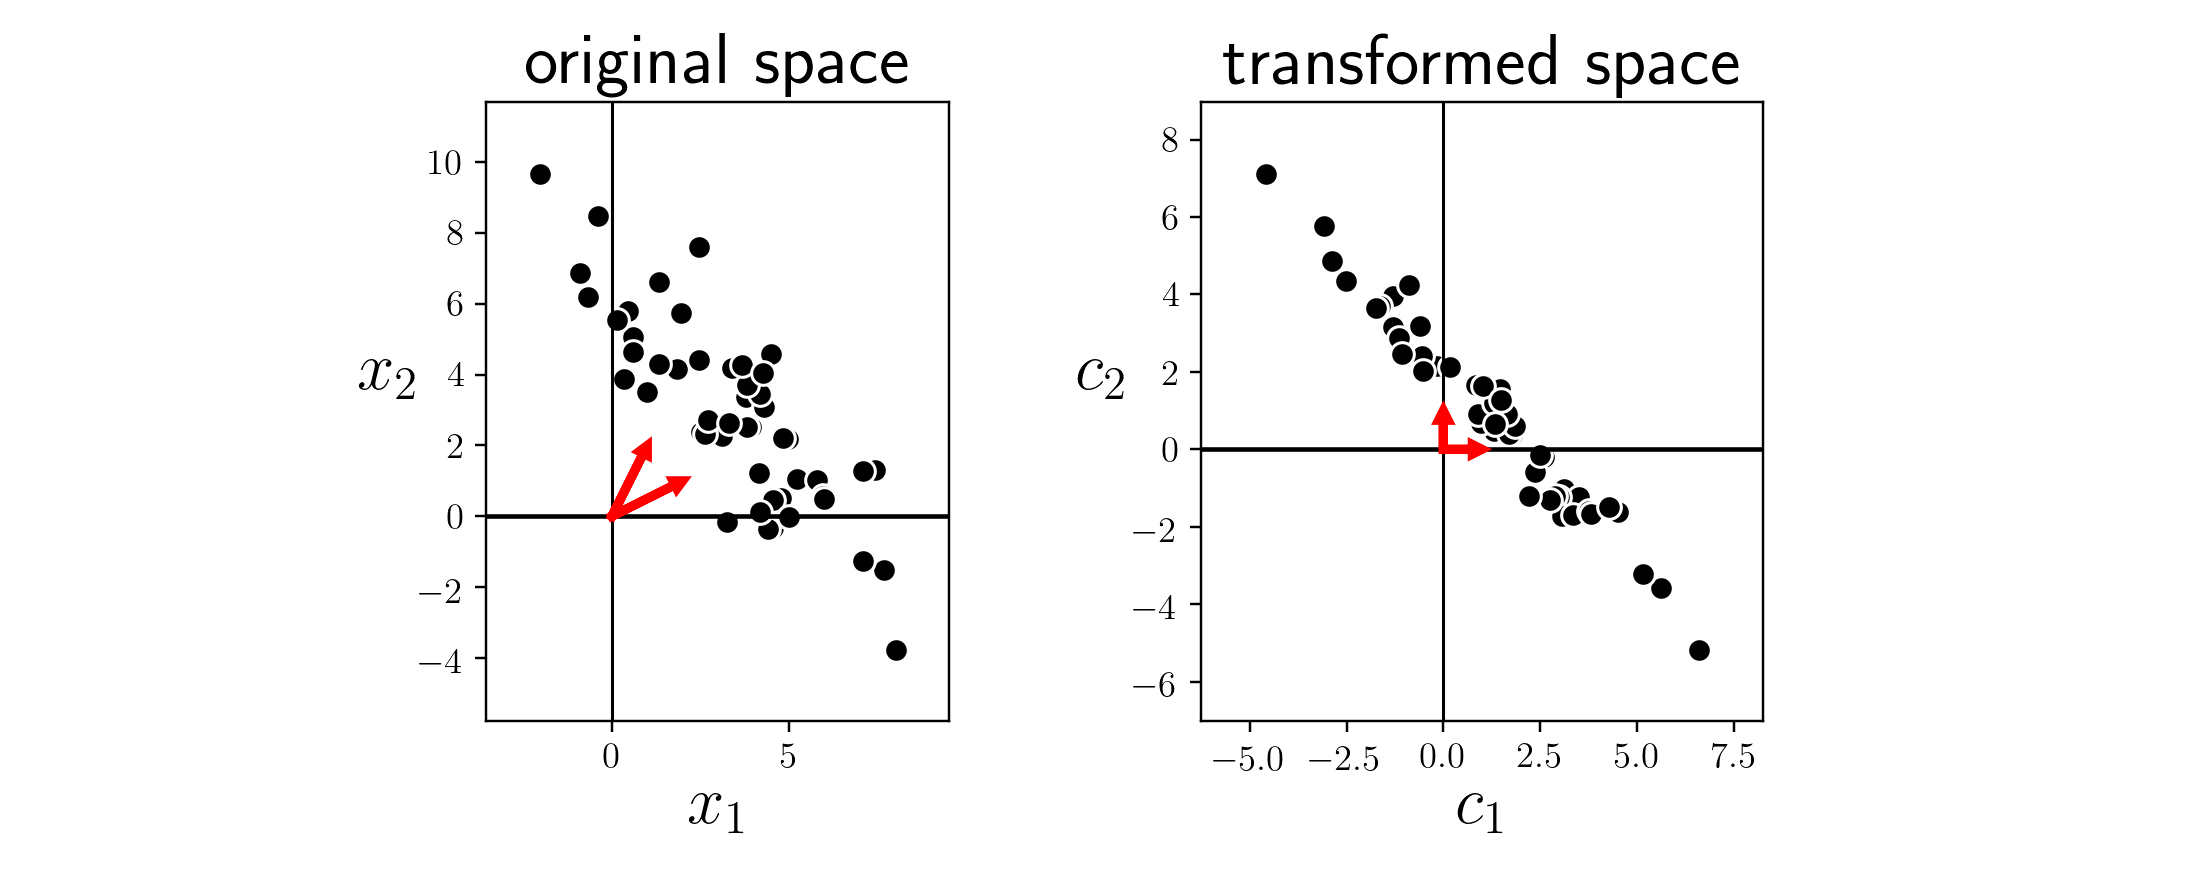

In [2]:
# load in dataset to perform PCA on
X_2d = np.loadtxt('2d_span_data.csv',delimiter=',')

# plot data and spanning set, and tranformed version
vec1 = [2,1]
vec2 = [1,2]
unsuplib.span_animation.perfect_visualize_transform_static(vec1=vec1,vec2=vec2,pts = X_2d)

#### <span style="color:#a50e3e;">Example 2. </span>  Dimension reduction using a fixed basis

<IPython.core.display.Javascript object>


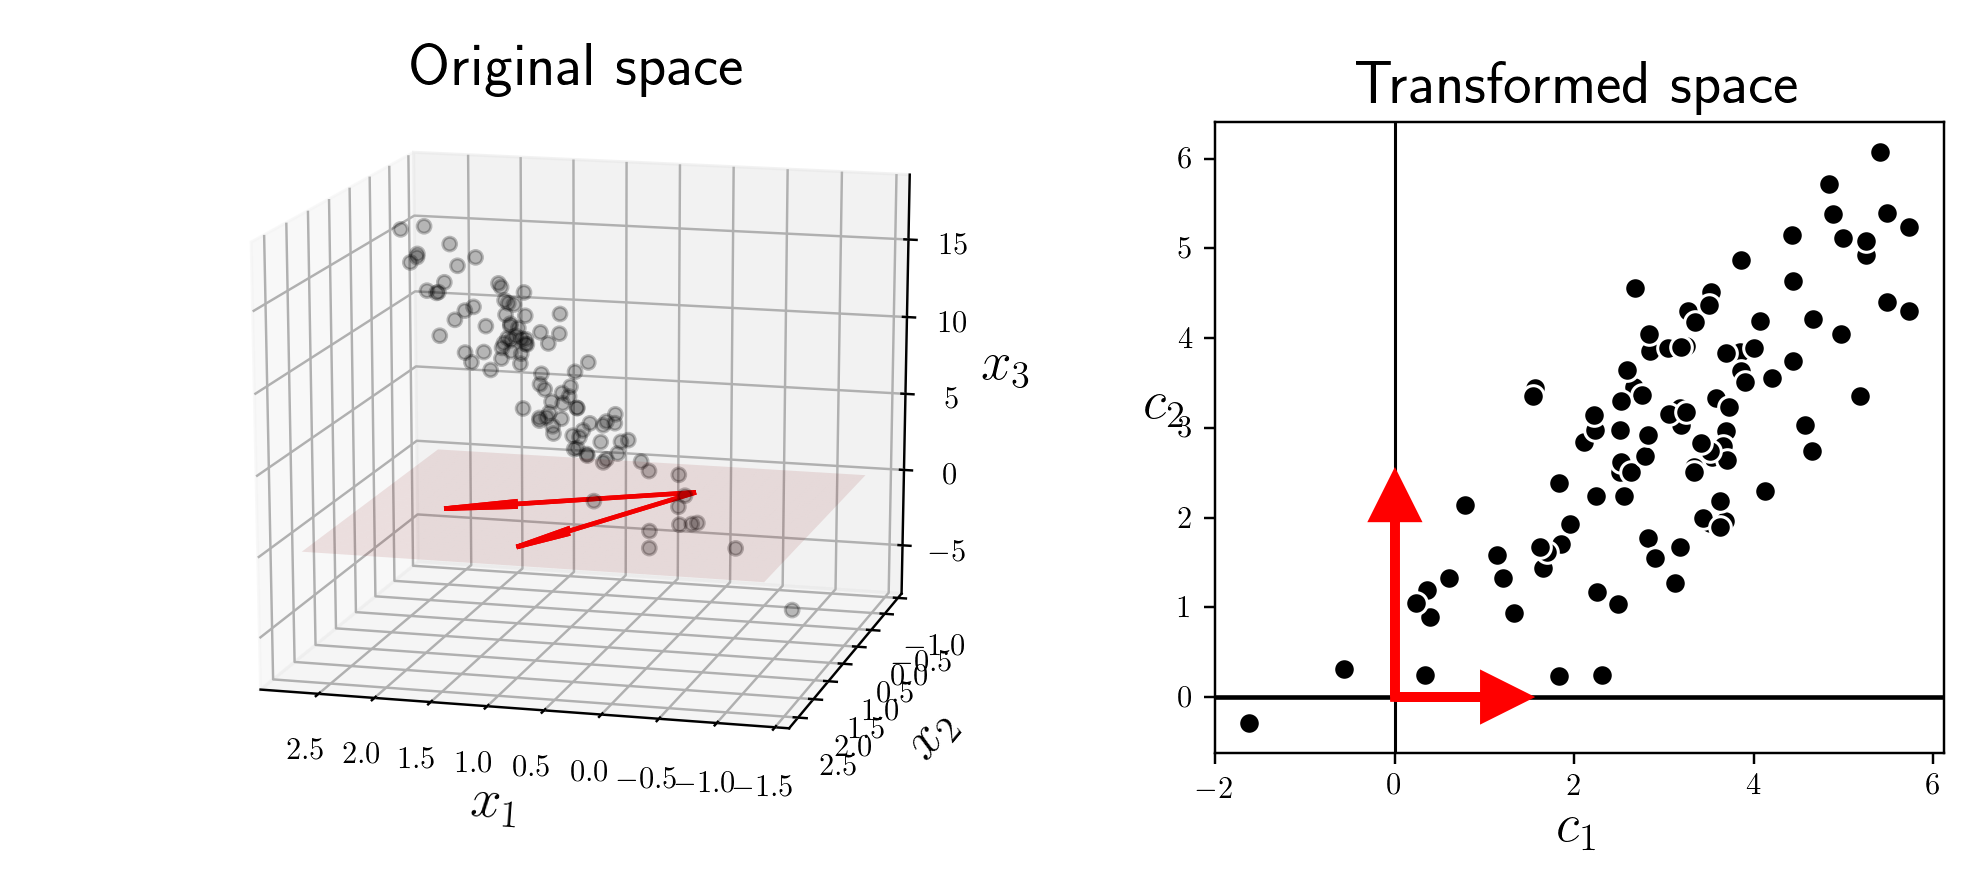

In [3]:
# load in dataset to perform PCA on
X_3d = np.loadtxt('3d_span_data.csv',delimiter=',')

# take two random vectors, project onto a subspace spanned by them
C = np.array([[2,1,0],[1,2,0]]).T
X_transformed_3d = np.dot(C.T,X_3d)

# produce visuals
init = [15,105]
unsuplib.PCA_demos.project_data_from_3d_to_2d(X_3d,X_transformed_3d,C,init)

#### <span style="color:#a50e3e;">Example 3. </span> Whitten data

<IPython.core.display.Javascript object>


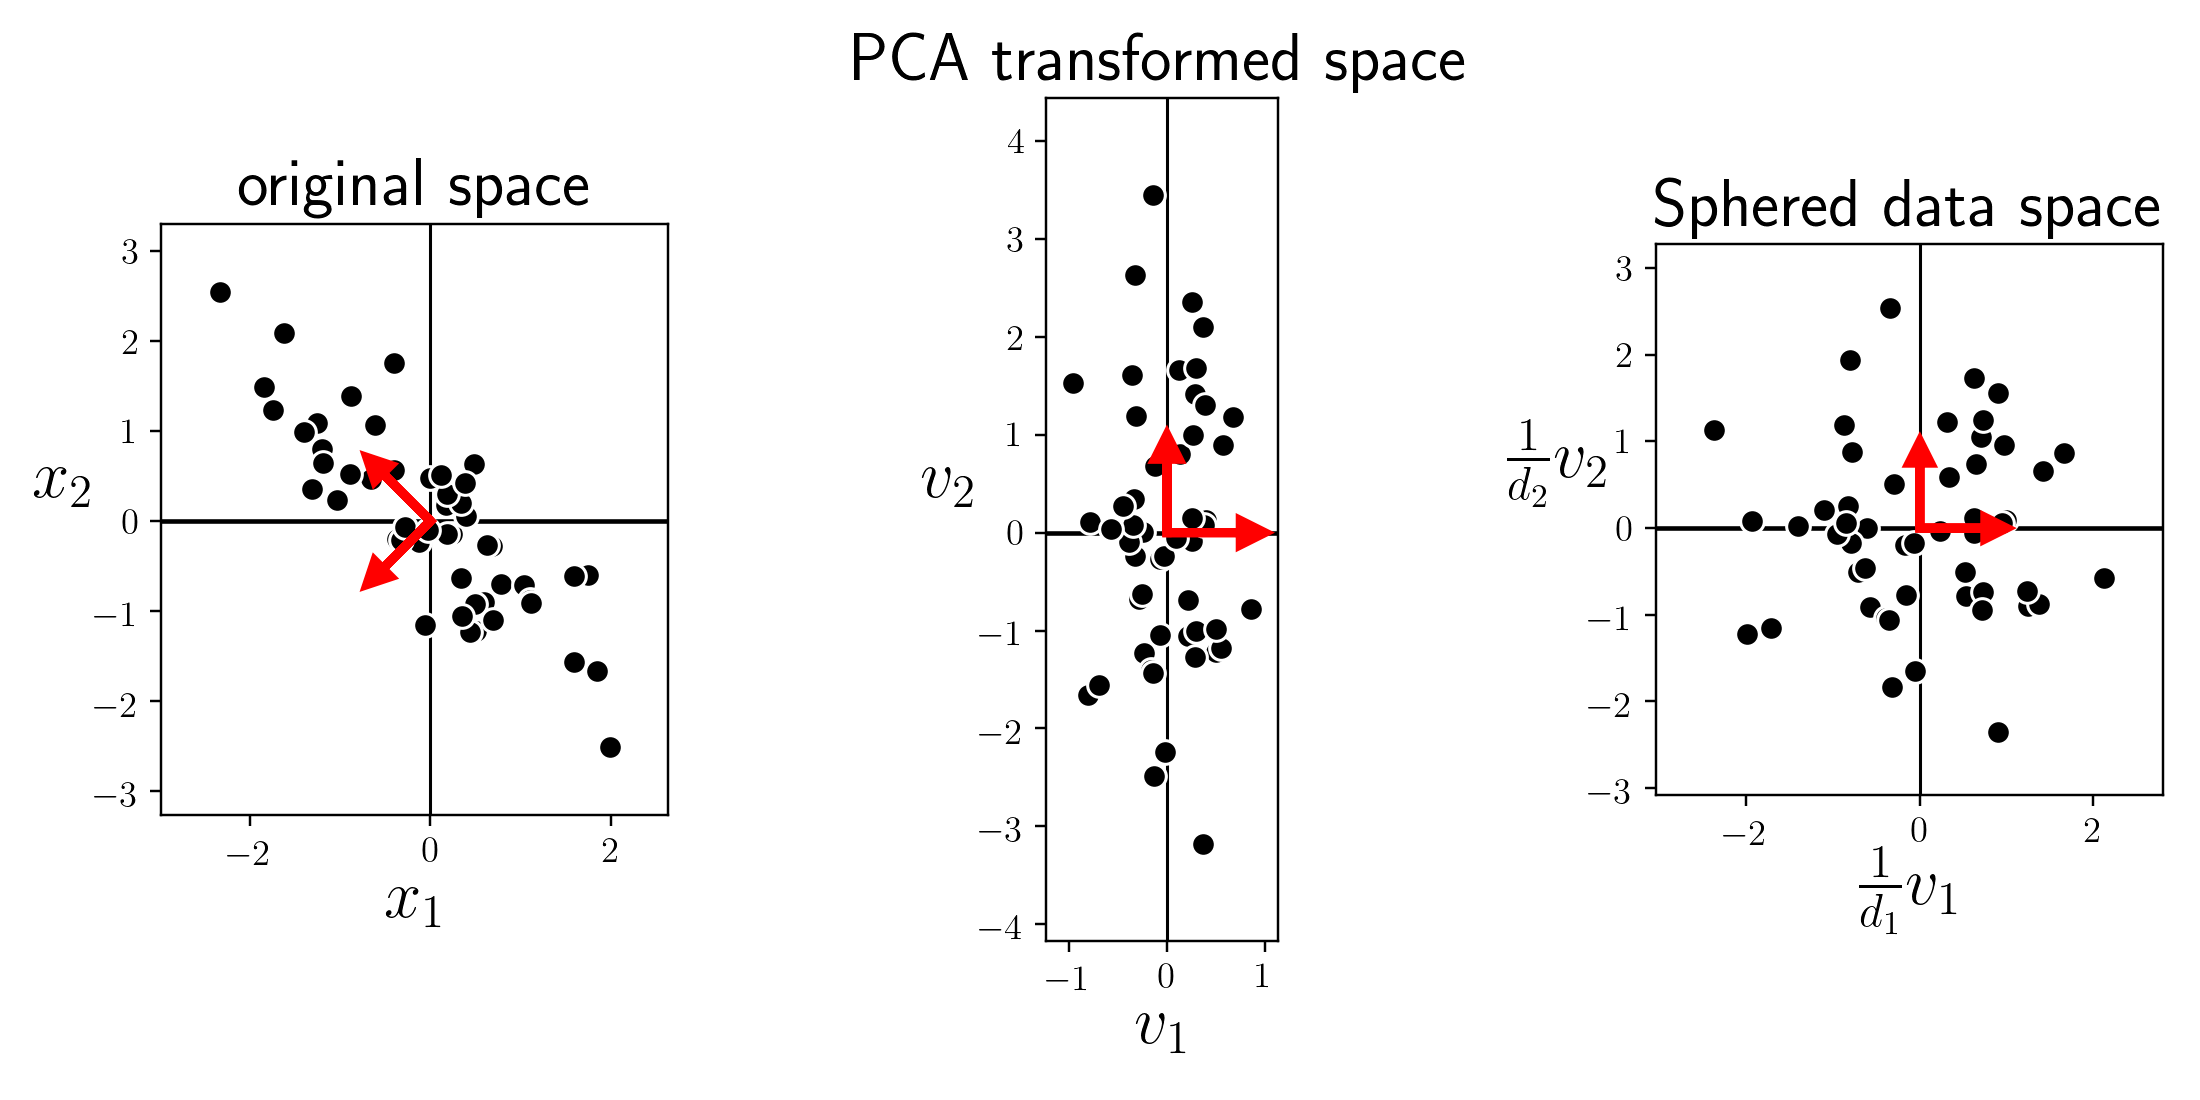

In [4]:
# load in dataset to perform PCA on
X_2d = np.loadtxt('2d_span_data.csv',delimiter=',')

# normalize data
X_normalized_2d = unsuplib.PCA_demos.normalize(X_2d)

# compute principal components
num_components = 2
pcs,eigs = unsuplib.PCA_demos.compute_pcs(X_normalized_2d,num_components)
X_transformed_2d = np.dot(pcs.T,X_normalized_2d)
unsuplib.span_animation.sphereing_visualizer(X_normalized_2d,pcs,eigs)

#### <span style="color:#a50e3e;">Example 4. </span>  Dimension reduction with PCA 

Orthonomral basis for PCA subspace.

<IPython.core.display.Javascript object>


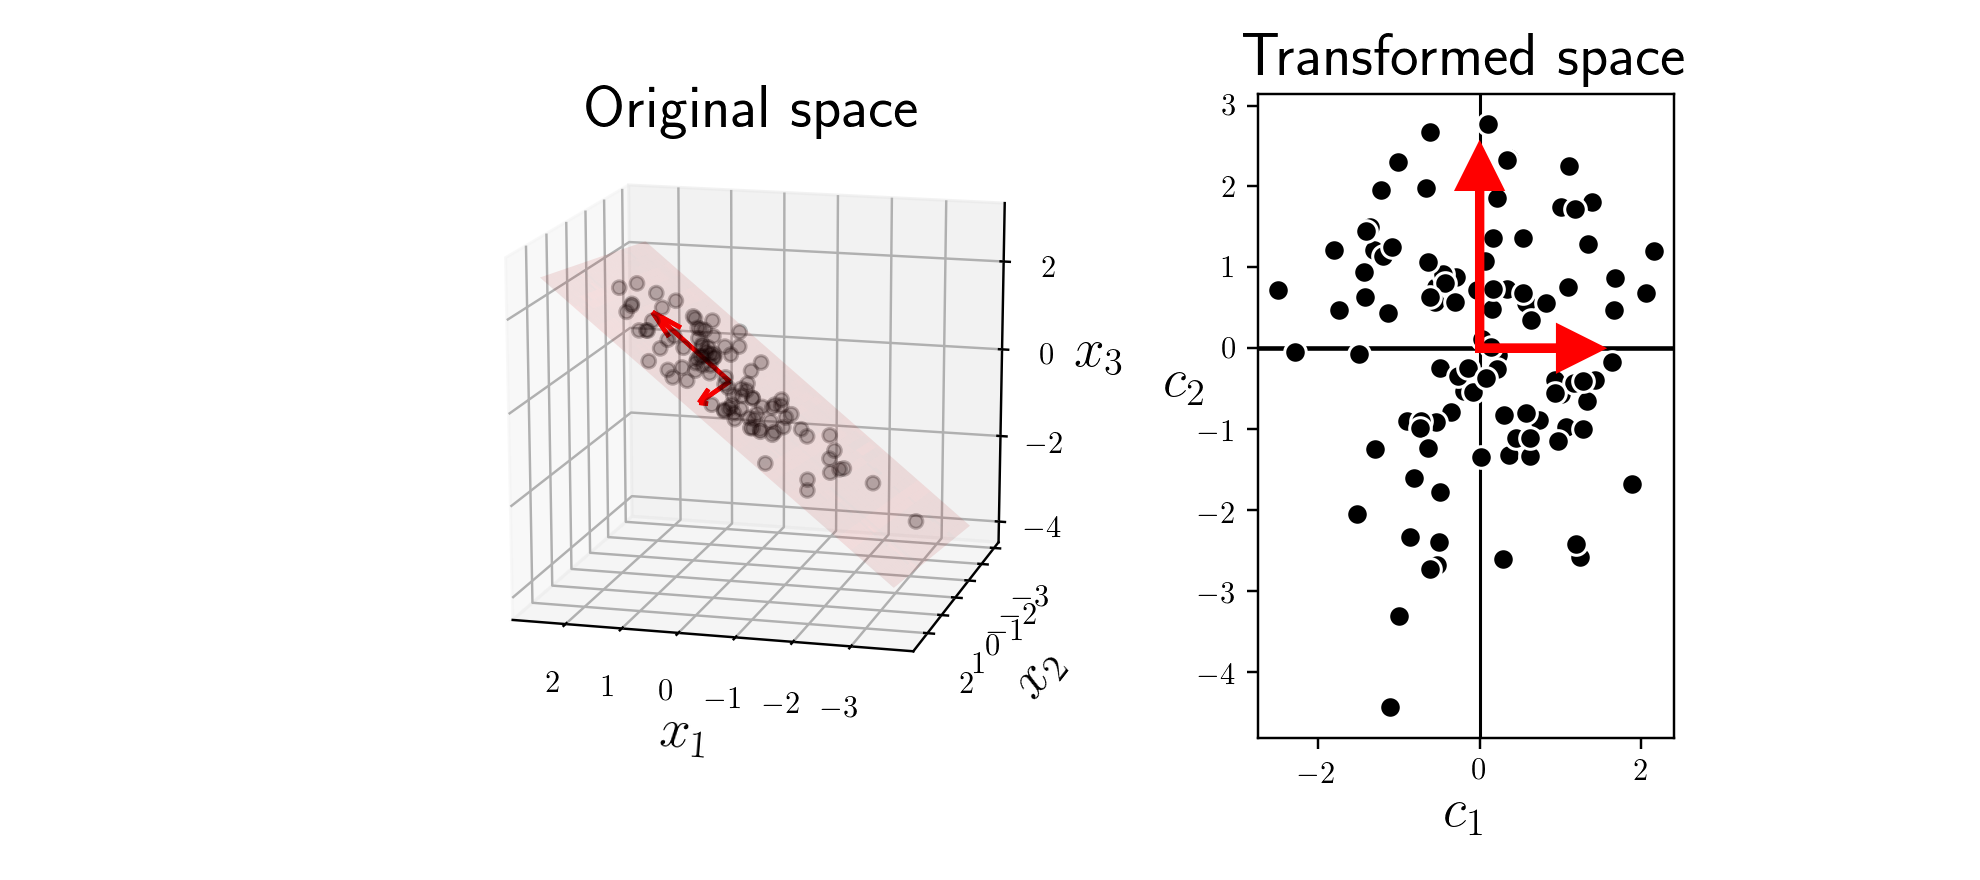

In [5]:
# load in dataset to perform PCA on
X_3d = np.loadtxt('3d_span_data.csv',delimiter=',')

# normalize data
X_normalized_3d = unsuplib.PCA_demos.normalize(X_3d)

# compute principal components
num_components = 2
pcs,eigs = unsuplib.PCA_demos.compute_pcs(X_normalized_3d,num_components)

# produce visuals
init = [15,105]
X_transformed_3d = np.dot(pcs.T,X_normalized_3d)
unsuplib.PCA_demos.project_data_from_3d_to_2d(X_normalized_3d,X_transformed_3d,2*pcs,init)

Random basis for PCA subspace.

<IPython.core.display.Javascript object>


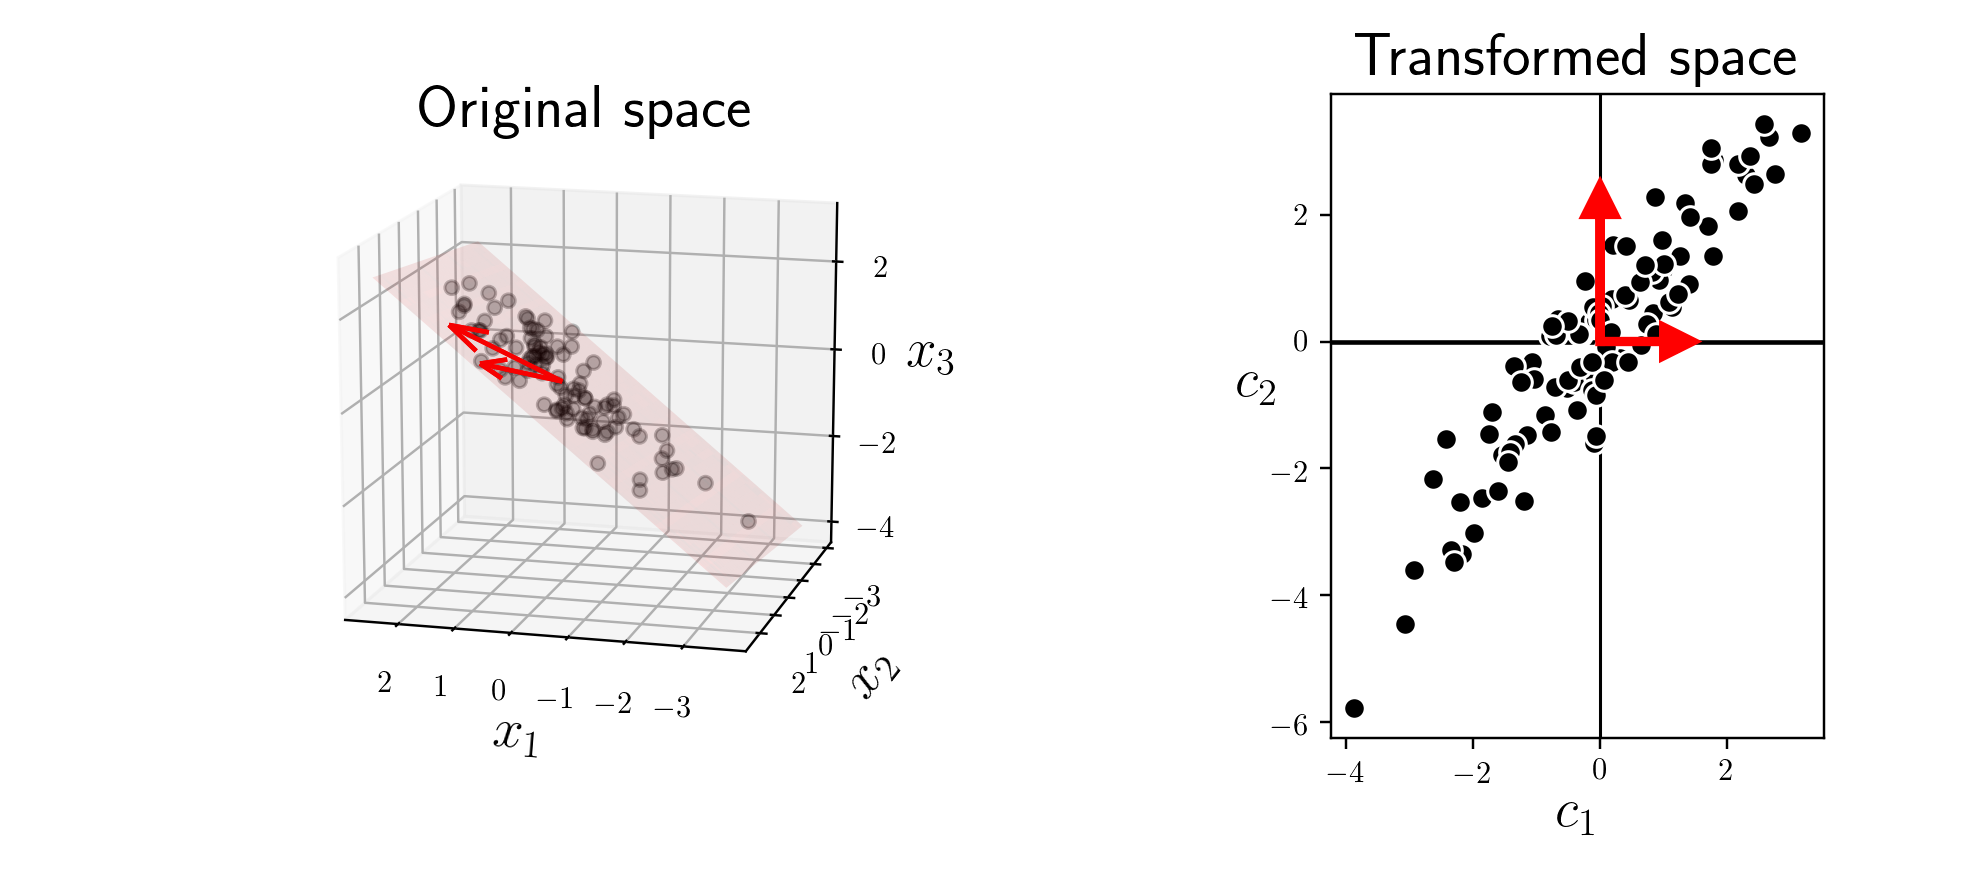

In [6]:
# compare to a random basis
a = np.array([[ 1.14329592],
              [ 0.92853737]])
b = np.array([[ 0.58722343],
              [ 1.06728657]])

# random basis in that subspace
random_basis = (a*pcs[:,0] + b*pcs[:,1]).T
X_transformed_3d = np.dot(random_basis.T,X_normalized_3d)

# produce visuals
init = [15,105]
unsuplib.PCA_demos.project_data_from_3d_to_2d(X_normalized_3d,X_transformed_3d,2*random_basis,init)

## TO DOs

- mirror Section 1 in Section 2: start with full basis representation - detail 'sphereing' - differentiate between the case where you project data
- Reza's skree-plot post / how to determine number of principal components - cross-validation?